# Consommation énergétique de différents langages

https://www.grid5000.fr/w/Grid5000:Home

ssh fsuarezpineros@access.grid5000.fr



# 1 Déroulement de la séance

Dans cette dernière séance de TP sur [grid5000](https://www.grid5000.fr/w/Grid5000:Home) nous allons étudier l'efficacité de trois langages de programmation classiques.

Comme au TP précédent les questions alternent entre un travail sur votre machine locale/celle de l’université ou au contraire sur la plateforme Grid5000. Dans ce dernier cas elles seront marquées d'une étoile (*).

Vous pourrez exécuter des commandes du terminal directement dans le notebook, par exemple pour exécuter la commande `ls` et récupérer le résultat.

In [19]:
import os
output=os.popen('dir').read()##je suis sur windows
print(output)

 Le volume dans le lecteur C s'appelle OS
 Le num‚ro de s‚rie du volume est 0E4E-4E1E

 R‚pertoire de c:\Users\fedes\Bureau\Bureau\BUREAU UNIV\L3 Info\S6\Impact\TP4

07/02/2023  11:03    <DIR>          .
07/02/2023  11:03    <DIR>          ..
26/01/2023  23:20    <DIR>          Codes
02/02/2023  14:13             7ÿ152 Codes.zip
07/02/2023  10:59             8ÿ579 Fichiers dune exp‚rience t‚moin-20230207.zip
07/02/2023  11:03           218ÿ735 getPowQuestion9.json
07/02/2023  11:08            46ÿ123 grid5000_part2.ipynb
07/02/2023  10:32             5ÿ360 process_energy_data.py
01/02/2022  15:20               430 python_sort.py
07/02/2023  10:59             2ÿ035 quickSort.class
01/02/2022  17:26             2ÿ689 quickSort.java
01/02/2022  15:19               830 quick_sort.c
07/02/2023  10:59            55ÿ085 quick_sort.exe
02/02/2023  16:31             1ÿ314 run_all_codes.py
02/02/2023  14:47    <DIR>          __MACOSX
07/02/2023  11:00    <DIR>          __pycache__
              1

# 2 Langages et code utilisés

## Question 1

Dans un premier temps, compilez le code C en utilisant l’instruction suivante dans un terminal ou dans le notebook via le mécanisme précédent:  
`gcc -o quick_sort quick_sort.c`  
Puis vérifiez que le programme s’exécute bien en lançant :  
`./quick_sort 20`  
Que représente le paramètre 20 ?
Qu’est ce qui est affiché dans la console ? A quoi cela correspond il ?

**Important pour la suite: je recommande de créer dans le dossier où se trouve le notebook un sous-dossier `Codes` où mettre les 3 fichiers C, Java et Python.**

## Question 2

In [20]:
import os
output=os.popen('py python_sort.py 200').read()
print(output)

0.00000000000000000000



In [21]:
import os
os.popen('gcc -o quick_sort quick_sort.c').read()
output = os.popen('quick_sort.exe 20').read()
print(output)

0.000000


In [22]:
import os
os.popen('javac quickSort.java').read()
output = os.popen('java quickSort.java 20').read()
print(output)

0.000006100000



## Question 3 (*)

Après avoir copié vos trois codes sources sur grid5000 (avec `scp file <login>@access.grid5000.fr:<site>/public/`), vérifiez que vous pouvez compiler
(lorsque nécessaire) et exécuter les programmes convenablement et que le résultat affiché
fait du sens pour des tableaux de petite taille.

# 3 Complexité algorithmique et calibration des expériences

Dans la suite, nous allons mesurer la puissance énergétique utilisée par ces trois codes. Compte tenu que
grid5000 échantillonne la puissance toutes les secondes il va falloir faire tourner un code pendant au moins 10
secondes pour espérer mesurer une valeur fiable. Bien entendu, comme le TP ne dure que 3 heures et que vous
n’aurez qu’un temps limité vous aurez aussi une borne supérieure sur la taille des tableaux considérés.

## Question 4

En faisant quelques tests, repérez les tailles de tableau pour lesquelles les 3 codes donnent
un temps de calcul d’environ 1 seconde. Quelle est alors la taille minimale $N_0$ pour que le code le plus lent tourne en au moins 10 secondes ?

*Réponse ici :*.  
tmp (1s):    python: 9700000  Java: 8200000  C: 5500000  
tmp (10s): python: 97000000  Java: 82000000 C: 55000000

## Question 5

 On va chercher à échantillonner des tailles de tableau entre $N_0$ et une valeur $N_1 = N_0 + (p-1) \Delta$ où $\Delta$ est le pas et $p$ le nombre d'échantillons.

Si on appelle $T_0$ le temps de calcul pour trier un tableau à $N_0$ éléments avec un certain langage, le temps de calcul total est borné par
$$ T_{total} = (p-1) T_{pause} + \sum_{k=0}^{p-1} (1 + k \Delta/N_0 ) T_0 
= (p-1) T_{pause} + p (1+\frac{p-1}{2}\frac\Delta{N_0}) T_0$$

En prenant $T_{pause}>20 s$ et $\Delta$ proche de $T_0$, proposez des valeurs de $p$ et $\Delta$ qui donnent un temps total raisonnable (environ 5 minutes).

La valeur de p = 9.3  
La valeur de $\Delta$ = 11

## Question 6

On donne les deux fonctions suivantes pour obtenir le temps de calcul d'un appel de fonction représentée dans la variable `func` :

In [23]:
def compute_time(func,N,VERBOSE=False):
    # func: chaîne de caractères permettant de lancer une commande, comme 'python3 python_sort.py'
    # N: taille du tableau à trier
    t1=time.time()
    res = os.popen(func + " " + str(N)).read()
    t2 = time.time()
    if VERBOSE:
        print(func + ", temps de calcul total = "+str(t2-t1) + " secondes")
        print("temps pour le tri = "+str(res))
    return t2-t1
    

def compute_times(func,all_N,t_pause=0,VERBOSE=False):
    # computation time for func(n) for n in all_N
    all_t = []
    for n in all_N:
        t = compute_time(func,n,VERBOSE)
        time.sleep(t_pause)
        all_t.append(t)
    return all_t


On donne aussi la fonction suivante qui permet de sauvegarder les temps de calcul en un format adapté.

In [24]:
def write_file(starting_times,end_time,data,filename='computation_time.txt'):
    # starting times: liste des 3 temps de début des simulations des différents codes (C/Java/Python)
    # end_time: temps final (un seul temps)
    # data: tel qu'expliqué plus bas
    f = open(filename, 'w')
    for i in range(len(starting_times)):
        f.write(starting_times[i])
        f.write('\n')
        for e in data[i][2]:
            f.write(str(e) + ',')
        f.write('\n')
        for e in data[i][1]:
            f.write(str(e) + ',')
        f.write('\n')
    f.write(end_time)
    f.write('\n')
    f.close()

Ecrire un script `run_all_codes.py` en Python qui permette :
- d’exécuter le tri rapide avec les 3 langages étudiés (Java, Python, C) pour des tableaux dont la taille est échantillonnée comme dans la question précédente
- d'obtenir la date de lancement du code, via `time.asctime(time.gmtime())`
- de récupérer les différents temps de calcul

Vous organiserez les résultats dans une liste `data` telle que:
- `data[i]` est une liste de taille 3 associée à un langage  (pour i = 0, 1, 2) avec
- `data[i][0]` donne le nom de la commande utilisée
- `data[i][1]` donne la liste des tailles de tableau
- `data[i][2]` donne la liste des temps de calcul

Ce qui vous permettra de sauvegarder les résultats dans un fichier .txt en utilisant la fonction `write_file` 

In [25]:
import time
def run_all_codes():

    data = []

    cmd0= ['py python_sort.py']
    cmd1=['gcc -o quick_sort quick_sort.c |./quick_sort.exe']
    cmd2=['java quickSort.java']

    list= [20,25,30,35,100]

    cmd0.append(list)
    cmd1.append(list)
    cmd2.append(list)

    data.append(cmd0)
    data.append(cmd1)
    data.append(cmd2)

    for i in range(len(data)):
        dataToAppend = compute_times(data[i][0],data[i][1])
        cmd = data[i]
        cmd.append(dataToAppend)
        data[i] = cmd
    
    return data

print (run_all_codes())

[['py python_sort.py', [20, 25, 30, 35, 100], [0.30189967155456543, 0.2219984531402588, 0.3089156150817871, 0.29727625846862793, 0.2615537643432617]], ['gcc -o quick_sort quick_sort.c |./quick_sort.exe', [20, 25, 30, 35, 100], [0.013232707977294922, 0.012883663177490234, 0.015959978103637695, 0.022948026657104492, 0.026925325393676758]], ['java quickSort.java', [20, 25, 30, 35, 100], [0.8042099475860596, 0.9019768238067627, 0.788203239440918, 0.8472034931182861, 0.6537408828735352]]]


## Question 7

Représentez le temps de calcul en fonction de la taille du tableau et du langage via 3 courbes
superposées sur un graphique.

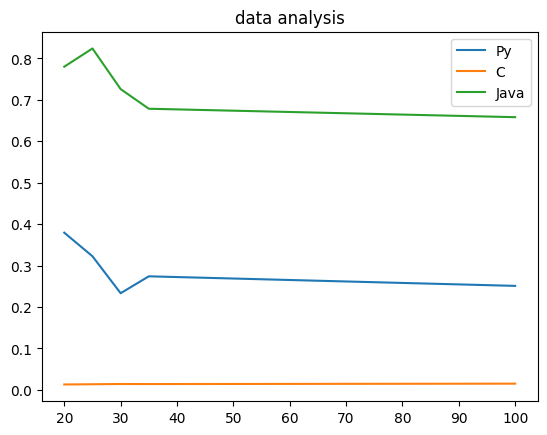

In [26]:
import numpy
import matplotlib.pyplot as plt
data = run_all_codes()
plt.title("data analysis")
plt.plot(data[0][1], data[0][2], label="Py")
plt.plot(data[1][1], data[1][2], label="C")
plt.plot(data[2][1], data[2][2], label="Java")
plt.legend()

# 4 Expériences sur grid5000

## Question 8 (*)

Vérifiez que le script python de la question 6 fonctionne bien sur grid5000 avec des tailles de tableau telles
que le temps total pour chaque langage est d’au plus une dizaine de secondes. Vous prendrez ainsi un temps de pause nul.

## Question 9

Récupérez les courbes de puissance pour vérifier la bonne concordance entre vos expériences
et les observations. Pour cela, reprenez ce qui a été fait au TP précédent:
- définir un couple (login, password)
- faire une requête en utilisant la fonction `get_power`

In [42]:
import requests
import matplotlib.pyplot as plt
from getpass import getpass

In [43]:
# Identification
user = input(f"Grid'5000 username: ")
password = getpass("Grid'5000 password: ")
g5k_auth = (user, password) 

In [44]:
def get_power(g5k_auth,node, site, start, stop, metric="bmc_fan_power_watt"):
    url = "https://api.grid5000.fr/stable/sites/%s/metrics?nodes=%s&metrics=%s&start_time=%s&end_time=%s" % (site, node, metric, start, stop)
    print(url)
    data = requests.get(url, auth=g5k_auth).json()
    return data

In [45]:
# Valeurs à modifier
node = "gros-5"
site = "nancy"
start_time = "2023-01-25T12:04"
stop_time = "2023-01-25T12:20"
metric = "pdu_outlet_power_watt"
data = get_power(g5k_auth,node, site, start_time, stop_time,metric)
#print(data)

https://api.grid5000.fr/stable/sites/nancy/metrics?nodes=gros-5&metrics=pdu_outlet_power_watt&start_time=2023-01-25T12:04&end_time=2023-01-25T12:20


Si on passe ensuite à des tailles de tableau plus grandes il est important qu’entre chaque exécution du tri
rapide il y ait une période de pause. **Dans la suite on prendra 20 secondes.**

## Question 10 (*)

**Vous voilà maintenant à l’expérience la plus importante du TP puisque vous allez lancer le
code d’évaluation du temps de calcul sur de grandes valeurs de tableaux. Cela va prendre un
certain temps, aussi il est bien de vérifier une dernière fois votre code, sur de petites tailles.**

Une fois le processus terminé, récupérez les temps de calcul qui ont été sauvegardés dans le fichier .txt en utilisant la commande `scp`.

## Question 11
Représentez l’évolution de la puissance énergétique en fonction du temps (physique) pour
les 3 codes. Qu’observez vous ?

*Vous utiliserez `get_power` comme à la question 9 pour obtenir les données utiles.*

## Question 12
Sauvegardez les valeurs de puissance dans un fichier .json, comme vu au TP précédent.

# 5 Analyse

On considère ici le module python `process_energy_data` qui va permettre d'analyser plus finement les expériences sur grid5000. Vous n'oublierez pas de l'importer à l'aide de (attention à l'emplacement du fichier)

In [ ]:
from process_energy_data import *

## Question 13

Utilisez la fonction `plot_power` du module `process_energy_data`. Pour cela vous aurez besoin de trois variables `all_dates`, `all_comp_times` et `all_n` que vous obtiendrez à l'aide de la fonction `read_computation_time_file`. 

Que remarquez vous ?


## Question 14

Expliquez pourquoi la fonction `integrate` donne une grandeur qui a la dimension d'une énergie. Déduisez en ce que fait la fonction `compute_energy`. 

*réponse ici*

## Question 15

Calculez les énergies associées à chaque appel du tri rapide. Représenter l'évolution de l'énergie en fonction de la taille des tableaux pour chaque langage, sur la même courbe. 

Concluez sur l’efficacité, à taille constante, de tel ou tel langage sur un autre.

## Question 16

Représentez enfin l’énergie en fonction du temps de calcul. Qu’observez vous ? Quelle conclusion pouvez vous en faire ?

## Question 17

Si on regarde attentivement les courbes de puissance, on constate qu'entre les appels au tri rapide la puissance ne redescend pas à 0. La puissance réellement pertinente est celle qui est obtenue en soustrayant la puissance mesurée à la puissance moyenne en phase inactive ("Idle").

Reprenez les mêmes analyses avec cette nouvelle puissance. Est ce que cela change quelque chose à vos conclusions ?
